In [1]:
# Import Libraries
import swat
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

### Create a Connection to CAS and Set Library <a name="casConnection"></a>

In [2]:
# Create Cloud Analytic Server (CAS) Connection 
conn = swat.CAS(host, portnum, user, password)

In [3]:
# Setup a CAS Library
conn.addcaslib(activeonadd=True,
               datasource=dict(srctype='path'),
               name='credit',
               path='/data/andre_data/credit_scorecard',
               subdirectories=True);

NOTE: 'credit' is now the active caslib.
NOTE: Cloud Analytic Services added the caslib 'credit'.


### Load Bank Data to CAS and Prep <a name="dataLoadPrep"></a>

In [4]:
# Load Data
credit_data = pd.read_csv('/data/andre_data/credit_scorecard/cs_accepts_train_small.csv')

In [5]:
# Shape
credit_data.shape

(156915, 27)

In [6]:
# Impute Median for Missing Values
credit_data['TimeAddress'] = credit_data['TimeAddress'].fillna((credit_data['TimeAddress'].median()))
credit_data['TimeJob'] = credit_data['TimeJob'].fillna((credit_data['TimeJob'].median()))

In [7]:
# Preview Data
pd.set_option('display.max_columns', 500)
credit_data.head()

_customerID target title  Nchildren  Nhousehold  Age  TimeAddress  TimeJob  \
0  c000000028    Bad     H          1           2   26          9.0     27.0   
1  c000000032    Bad     H          0           1   34         42.0     39.0   
2  c000000040   Good     R          0           2   35         72.0     18.0   
3  c000000051   Good     H          3           5   34         48.0     60.0   
4  c000000065   Good     R          0           1   22        216.0     45.0   

   tel  NumMyLoan  NumFinLoan  NumLoans  Income  EC_Card  IncLevel status  \
0    1          0           1         3   10000        0         2      U   
1    1          0           1         1    2400        0         1      U   
2    2          0           0         0       0        1         0      V   
3    1          0           1         1       0        1         0      V   
4    2          0           0         0       0        1         0      U   

   bureau  region  regionLarge  cash      product  resid     nat prof  \
0       1       4            1  2500    Furniture  Lease  German    G   
1       1       7            1  3000  Electronics  Lease  German  NaN   
2       3       0            0  1500  Dept. Store  Lease  German  NaN   
3       1       7            1   700  Dept. Store  Owner  German    C   
4       1       4            1  3000    Furniture  Lease  German  NaN   

               car card saving  
0              Car   No    Yes  
1              Car   No     No  
2  Without Vehicle  Yes     No  
3              Car  Yes     No  
4              Car  Yes    Yes

In [8]:
# Write Out Dataframe to CAS
credit_data = conn.upload_frame(credit_data, casout=dict(name='credit_data', replace=True))

NOTE: Cloud Analytic Services made the uploaded file available as table CREDIT_DATA in caslib credit.
NOTE: The table CREDIT_DATA has been created in caslib credit from binary data uploaded to Cloud Analytic Services.


In [9]:
conn.tableinfo()

[TableInfo]

           Name    Rows  Columns  IndexedColumns Encoding  \
 0  CREDIT_DATA  156915       27               0    utf-8   
 
          CreateTimeFormatted           ModTimeFormatted  \
 0  2018-12-13T14:43:25+00:00  2018-12-13T14:43:25+00:00   
 
          AccessTimeFormatted JavaCharSet    CreateTime       ModTime  \
 0  2018-12-13T14:43:25+00:00        UTF8  1.860331e+09  1.860331e+09   
 
      AccessTime  Global  Repeated  View SourceName SourceCaslib  Compressed  \
 0  1.860331e+09       0         0     0                                   0   
 
   Creator Modifier     SourceModTimeFormatted  SourceModTime  
 0     sas           2018-12-13T14:43:24+00:00   1.860331e+09  

+ Elapsed: 0.000476s, user: 5e-05s, sys: 4.1e-05s, mem: 0.68mb

### Explore Data <a name="exploreData"></a>

In [10]:
# View Target Variable Balance
credit_data['target'].freq()

[Frequency]

 Frequency for CREDIT_DATA
 
    Column CharVar FmtVar  Level  Frequency
 0  target     Bad    Bad      1    31704.0
 1  target    Good   Good      2   125211.0

+ Elapsed: 0.0153s, user: 0.0946s, sys: 0.00392s, mem: 1.98mb

In [11]:
# Numeric Variables Summary
conn.CASTable('credit_data').describe()

Nchildren     Nhousehold            Age    TimeAddress  \
count  156915.000000  156915.000000  156915.000000  156915.000000   
mean        0.880878       2.483765      35.937559      92.282038   
std         1.052363       1.343317      11.301323      87.014462   
min         0.000000       1.000000      18.000000       0.000000   
25%         0.000000       1.000000      27.000000      24.000000   
50%         1.000000       2.000000      34.000000      60.000000   
75%         2.000000       3.000000      43.000000     144.000000   
max         6.000000       8.000000      72.000000     384.000000   

             TimeJob            tel      NumMyLoan     NumFinLoan  \
count  156915.000000  156915.000000  156915.000000  156915.000000   
mean       78.329280       1.354077       0.594908       0.495357   
std        82.825167       0.478234       0.886872       0.499980   
min         0.000000       1.000000       0.000000       0.000000   
25%        21.000000       1.000000       0.000000       0.000000   
50%        45.000000       1.000000       0.000000       0.000000   
75%       108.000000       2.000000       2.000000       1.000000   
max       360.000000       2.000000       2.000000       1.000000   

            NumLoans         Income        EC_Card      IncLevel  \
count  156915.000000  156915.000000  156915.000000  156915.00000   
mean        0.930211    1956.248287       0.319179       1.01778   
std         1.071630    1586.337523       0.466160       0.77323   
min         0.000000       0.000000       0.000000       0.00000   
25%         0.000000       0.000000       0.000000       0.00000   
50%         1.000000    2100.000000       0.000000       1.00000   
75%         1.000000    2800.000000       1.000000       2.00000   
max         9.000000   10000.000000       1.000000       2.00000   

              bureau         region    regionLarge           cash  
count  156915.000000  156915.000000  156915.000000  156915.000000  
mean        1.741045       3.276016       0.733429    2310.432400  
std         0.965084       2.542618       0.442168    2673.116409  
min         1.000000       0.000000       0.000000       0.000000  
25%         1.000000       0.000000       0.000000    1000.000000  
50%         1.000000       3.000000       1.000000    1500.000000  
75%         3.000000       5.000000       1.000000    2500.000000  
max         3.000000       9.000000       1.000000   20000.000000

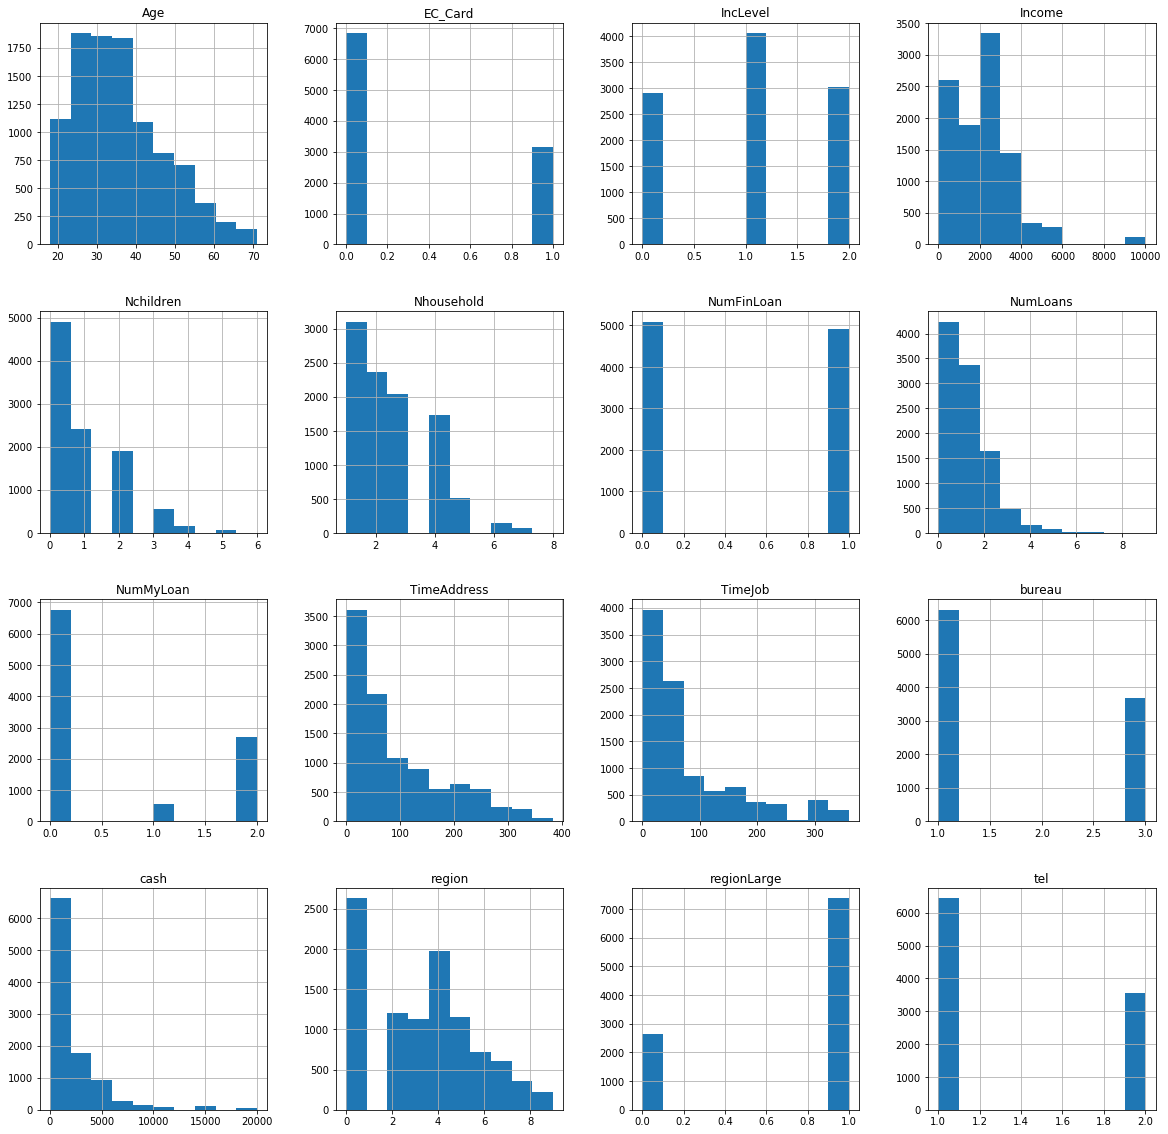

In [12]:
# Visualize Numeric Variable Distributions
credit_data.hist(figsize = (20, 20));

### Begin Modeling <a name="beginModel"></a>

<a name="woe"></a>

<div class="alert alert-info">
<b>Transformations, Weight of Evidence, & Information Value</b>
</div>

In [13]:
# Load Regression Action Set
conn.loadactionset(actionset='regression')
conn.loadactionset(actionset='dataPreprocess');

NOTE: Added action set 'regression'.
NOTE: Added action set 'dataPreprocess'.


In [14]:
# Set Up Inputs and Target
nominal_inputs = ['title', 'status', 'product', 'resid', 'nat', 'prof', 'car', 'G_Card', 'saving']
cont_inputs = ['Nchildren', 'Nhousehold', 'Age', 'TimeAddress', 'TimeJob', 'tel', 'NumMyLoan', 'NumFinLoan',
               'NumLoans', 'Income', 'EC_Card', 'IncLevel', 'bureau', 'region', 'regionLarge', 'cash']
target = 'target'

#### Set up Weight of Evidence Transform

In [15]:
# Transform Pipeline
req_packs = []

req_pack1 = dict(name='req_intervals',
                inputs=cont_inputs,
                targets=target,
                events='Bad',
                discretize=dict(method='woe',
                                args = dict(minNBins=3, maxNBins=7)),
                output=dict(scoreWOE=True))

req_pack2 = dict(name='req_nominals',
                inputs=nominal_inputs,
                targets=target,
                events='Bad',
                cattrans=dict(method='woe',
                              args=dict(minNBins=3, maxNBins=7)),
                output=dict(scoreWOE=True))

req_packs.append(req_pack1)
req_packs.append(req_pack2)

In [16]:
# Transform
woe_transform = conn.transform(table=credit_data,
                               requestPackages=req_packs, 
                               casOut=dict(name='woe_transform', replace=True),
                               code = dict(casout=dict(name='woe_code', replace=True)),
                               copyVars = ['target', '_customerID'],
                               outVarsNameGlobalPrefix='woe');

In [ ]:
def calculate_woe_iv(woe_transform, feature, target):
    lst = [woe_transform]
    for i in range(woe_transform[feature].nunique()):
        val = list(woe_transform[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[woe_transform[feature] == val].count()[feature],
            'Good': dataset[(woe_transform[feature] == val) & (woe_transform[target] == 0)].count()[feature],
            'Bad': dataset[(woe_transform[feature] == val) & (woe_transform[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    woe_transform = dset.sort_values(by='WoE')

In [17]:
# preview Weights Table
conn.CASTable('woe_transform').head(n=5)

Selected Rows from Table WOE_TRANSFORM

  target _customerID   woe_Age  woe_bureau  woe_cash  woe_EC_Card  \
0   Good  c000313007 -1.122775    0.089431 -0.342228    -0.214584   
1   Good  c000313013 -0.595045   -0.038464  0.085037    -0.214584   
2    Bad  c000313020 -1.122775   -0.038464 -0.342228    -0.214584   
3   Good  c000313025  1.314781   -0.038464 -0.044661     0.585838   
4   Good  c000313037  0.143014   -0.038464  0.451330    -0.214584   

   woe_IncLevel  woe_Income  woe_Nchildren  woe_Nhousehold  woe_NumFinLoan  \
0     -0.432184   -0.238071      -0.223703       -0.536068       -0.115021   
1      0.164962   -0.027397      -0.223703        0.333864        0.125904   
2     -0.432184   -0.783027      -0.223703       -0.536068       -0.115021   
3      0.617950    0.678946      -0.223703        0.333864       -0.115021   
4     -0.432184   -0.157973      -0.223703        0.333864        0.125904   

   woe_NumLoans  woe_NumMyLoan  woe_region  woe_regionLarge   woe_tel  \
0      0.049761      -0.081022   -0.046023        -0.052918  0.067595   
1     -0.034920      -0.347649   -0.046023        -0.052918  0.067595   
2      0.034676      -0.081022   -0.106657        -0.052918  0.067595   
3      0.034676      -0.081022   -0.106657        -0.052918  0.067595   
4      0.049761       0.302566    0.133356        -0.052918  0.067595   

   woe_TimeAddress  woe_TimeJob   woe_car  woe_card   woe_nat  woe_product  \
0        -0.064647    -0.583998 -0.388738 -0.260065  0.139282    -0.115595   
1        -0.020547     0.020216  0.106343 -0.260065  0.139282    -0.115595   
2        -0.100103     0.020216 -0.388738 -0.260065 -0.018781     0.067617   
3         0.316728    -0.306499  0.106343  0.668017 -0.018781     0.194776   
4        -0.427055     0.358676  0.106343 -0.260065  0.139282     0.194776   

   woe_prof  woe_resid  woe_saving  woe_status  woe_title  
0       NaN  -0.022113   -0.007078   -0.627565  -0.033008  
1 -0.316603  -0.022113    0.009154    0.390124  -0.033008  
2 -0.160789        NaN   -0.007078   -0.627565   0.085426  
3       NaN  -0.022113   -0.007078    0.390124  -0.033008  
4       NaN  -0.022113    0.009154    0.390124  -0.033008

#### View Information Values and Predictive Power of Features

In [18]:
# Information Value (IV) to Determine Predictive Features
var_info_df = pd.DataFrame(woe_transform['VarTransInfo'])
var_info_df.sort_values(by=['IV'], ascending=True, inplace=True)

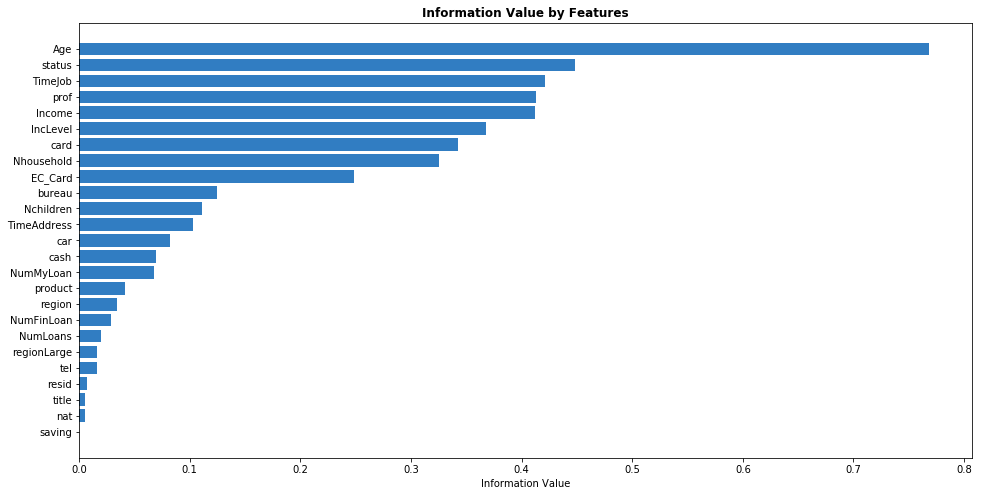

In [19]:
# Plot IV
plt.figure(figsize=(16,8))
plt.barh(var_info_df['Variable'], var_info_df['IV'], color = '#317DC2')
plt.xlabel('Information Value')
plt.title('Information Value by Features', fontweight="bold");

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.heatmap(credit_data.corr(), annot = True, vmin=0, vmax=1)
correlations = credit_data.corr()['TARGET'].sort_values()
correlations.head(7)
plt.title('All Correlations');

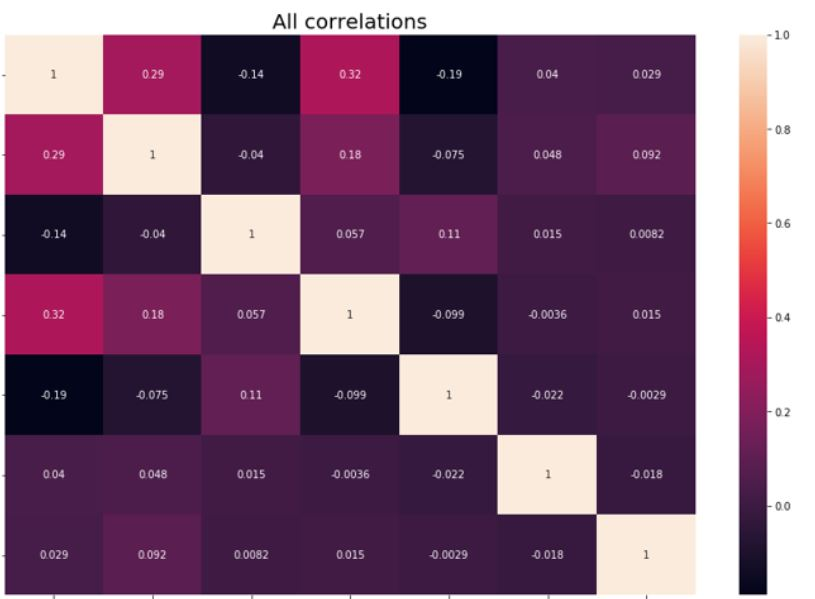

In [11]:
from IPython.display import Image
Image('corr.jpg')

#### View WOE Values by Bin for Several Features

In [20]:
# Write Out CAS Table to Pandas Dataframe
woe_transform_df = conn.fetch(table='woe_transform', maxrows=len(credit_data), to=len(credit_data))
woe_transform_df = pd.DataFrame(woe_transform_df['Fetch'])

In [21]:
# Convert Bin Details to Pandas DF for Plotting
woe_bin_df = pd.DataFrame(woe_transform['BinDetails'])

# Time on Job DF
woe_bin_toj = woe_bin_df[woe_bin_df['Variable']=='TimeJob']
woe_bin_age = woe_bin_df[woe_bin_df['Variable']=='Age']
woe_bin_cash = woe_bin_df[woe_bin_df['Variable']=='cash']
woe_bin_prof = woe_bin_df[woe_bin_df['Variable']=='prof']

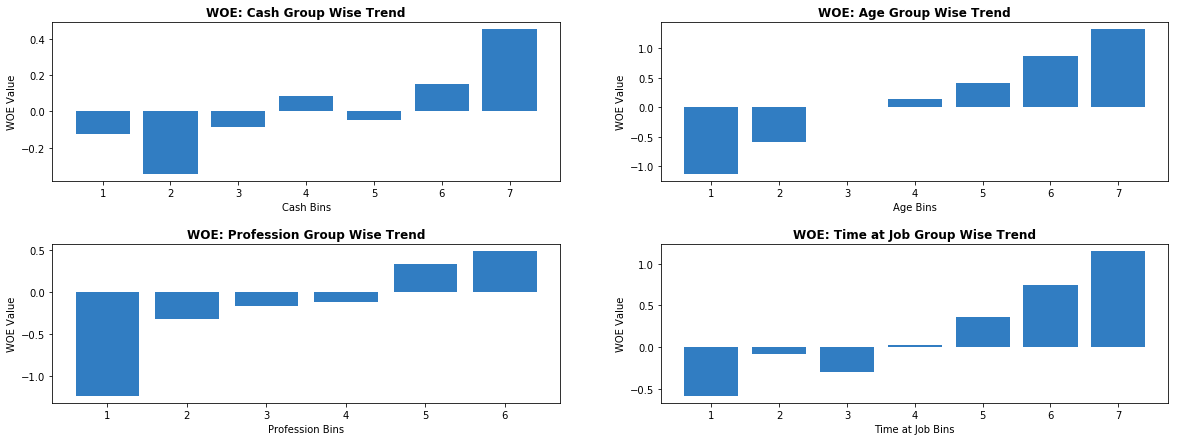

In [22]:
# Plot Examples -  WoE value is a measure of the "strength‚Äù of a grouping for separating good and bad credit
plt.figure(figsize=(20,7))
plt.subplots_adjust(hspace=.4)

plt.subplot(2, 2, 1)
plt.bar(woe_bin_cash['BinId'], woe_bin_cash['WOE'], color = '#317DC2')
plt.title('WOE: Cash Group Wise Trend', fontweight="bold")
plt.xlabel('Cash Bins')
plt.ylabel('WOE Value')

plt.subplot(2, 2, 2)
plt.bar(woe_bin_age['BinId'], woe_bin_age['WOE'], color = '#317DC2')
plt.title('WOE: Age Group Wise Trend', fontweight="bold")
plt.xlabel('Age Bins')
plt.ylabel('WOE Value')

plt.subplot(2, 2, 3)
plt.bar(woe_bin_prof['BinId'], woe_bin_prof['WOE'], color = '#317DC2')
plt.title('WOE: Profession Group Wise Trend', fontweight="bold")
plt.xlabel('Profession Bins')
plt.ylabel('WOE Value')

plt.subplot(2, 2, 4)
plt.bar(woe_bin_toj['BinId'], woe_bin_toj['WOE'], color = '#317DC2')
plt.title('WOE: Time at Job Group Wise Trend', fontweight="bold")
plt.xlabel('Time at Job Bins')
plt.ylabel('WOE Value');

<a name="lr"></a>

<div class="alert alert-info">
<b>Logistic Regression</b>
</div>

In [23]:
# Set Empty CAS Table For Model Results
lr_woe_model = conn.CASTable("lr_woe_model",replace = True)

In [25]:
# Concat 'woe_' with Column Names for Inputs
woe_inputs = ['woe_' + str(col)  for col in credit_data.columns[2:]]

lr_woe_model = conn.logistic(table = 'woe_transform',
                             model = dict(depvar=[dict(name=target,
                                                       options=dict(ref='Good'))],
                                          effects=woe_inputs),
                             selection = dict(method='FORWARD'),
                             store = dict(name='my_lr_Model', replace=True),
                             code = dict(casout=dict(name='lr_code', replace=True)),
                             output = dict(casOut=dict(name='lr_woe_model', replace=True),
                                           copyVars=['target', '_customerID'], predprobs=True))

NOTE: Convergence criterion (GCONV=1E-8) satisfied.


<a name="scorecard"></a>

<div class="alert alert-info">
<b>Scorecard</b>
</div>

In [26]:
# Parameter Table from Logistic Regression
lr_woe_mod_params = pd.DataFrame(lr_woe_model['SelectedModel.ParameterEstimates'])
lr_woe_mod_params = lr_woe_mod_params[['Parameter','Estimate']]

# Intercept
intercept = lr_woe_mod_params['Estimate'][0]

# Drop Intercept
lr_woe_mod_params = lr_woe_mod_params[lr_woe_mod_params['Parameter'] != 'Intercept']

In [27]:
# Fill NA Values with Zero
woe_transform_df = woe_transform_df.fillna(0)

In [28]:
woe_transform_df.head()

target _customerID   woe_Age  woe_bureau  woe_cash  woe_EC_Card  \
0   Good  c000313007 -1.122775    0.089431 -0.342228    -0.214584   
1   Good  c000313013 -0.595045   -0.038464  0.085037    -0.214584   
2    Bad  c000313020 -1.122775   -0.038464 -0.342228    -0.214584   
3   Good  c000313025  1.314781   -0.038464 -0.044661     0.585838   
4   Good  c000313037  0.143014   -0.038464  0.451330    -0.214584   

   woe_IncLevel  woe_Income  woe_Nchildren  woe_Nhousehold  woe_NumFinLoan  \
0     -0.432184   -0.238071      -0.223703       -0.536068       -0.115021   
1      0.164962   -0.027397      -0.223703        0.333864        0.125904   
2     -0.432184   -0.783027      -0.223703       -0.536068       -0.115021   
3      0.617950    0.678946      -0.223703        0.333864       -0.115021   
4     -0.432184   -0.157973      -0.223703        0.333864        0.125904   

   woe_NumLoans  woe_NumMyLoan  woe_region  woe_regionLarge   woe_tel  \
0      0.049761      -0.081022   -0.046023        -0.052918  0.067595   
1     -0.034920      -0.347649   -0.046023        -0.052918  0.067595   
2      0.034676      -0.081022   -0.106657        -0.052918  0.067595   
3      0.034676      -0.081022   -0.106657        -0.052918  0.067595   
4      0.049761       0.302566    0.133356        -0.052918  0.067595   

   woe_TimeAddress  woe_TimeJob   woe_car  woe_card   woe_nat  woe_product  \
0        -0.064647    -0.583998 -0.388738 -0.260065  0.139282    -0.115595   
1        -0.020547     0.020216  0.106343 -0.260065  0.139282    -0.115595   
2        -0.100103     0.020216 -0.388738 -0.260065 -0.018781     0.067617   
3         0.316728    -0.306499  0.106343  0.668017 -0.018781     0.194776   
4        -0.427055     0.358676  0.106343 -0.260065  0.139282     0.194776   

   woe_prof  woe_resid  woe_saving  woe_status  woe_title  
0  0.000000  -0.022113   -0.007078   -0.627565  -0.033008  
1 -0.316603  -0.022113    0.009154    0.390124  -0.033008  
2 -0.160789   0.000000   -0.007078   -0.627565   0.085426  
3  0.000000  -0.022113   -0.007078    0.390124  -0.033008  
4  0.000000  -0.022113    0.009154    0.390124  -0.033008

In [29]:
# Filter WOE Transform Table to Only Selected Features from Logistic Regression
selected_params = lr_woe_mod_params['Parameter']

woe_transform_df_selected = woe_transform_df[selected_params]

In [30]:
# Ensure Shapes are Correct for Matrix Multiplication
display(woe_transform_df_selected.shape)
display(lr_woe_mod_params.shape)

(156915, 22)

(22, 2)

In [31]:
# Set Parameter Name as Index
lr_woe_mod_params_index = lr_woe_mod_params.set_index('Parameter')

In [32]:
# Multiply lr coefficients to observation WOE Values
scorecard = woe_transform_df_selected[lr_woe_mod_params_index.index].apply(lambda x: x*lr_woe_mod_params_index['Estimate'].T,axis=1)

In [33]:
# Get Logit Values
scorecard['logit'] = scorecard[list(scorecard.columns)].sum(axis=1) + intercept

In [34]:
# Convert Logit to Odds Ratio and Odds Ratio to Probability
scorecard['odds'] = np.exp(scorecard['logit'])
scorecard['probs'] = scorecard['odds'] / (scorecard['odds'] + 1)

In [35]:
# Set up Scoring Logic
target_score = 600
target_odds = 30
pts_double_odds = 20

factor = pts_double_odds / np.log(2)
offset = target_score - factor * np.log(target_odds)

In [36]:
# Score
scorecard['score'] = offset + factor * scorecard['logit']

In [37]:
# Add Back Customer ID and Target Features
scorecard['customer_id'] = woe_transform_df['_customerID']
scorecard['target'] = woe_transform_df['target']

In [38]:
# Remove Score Outliers (245, 0.156% of Total)
scorecard = scorecard[scorecard['score'] <= 600]

In [39]:
# Preview Score Data (Scores, Odds, Probs, etc)
scorecard.head(n=5)

woe_title  woe_Nchildren  woe_Nhousehold   woe_Age  woe_TimeAddress  \
0  -0.042035       0.204085       -0.231106  0.922910        -0.018216   
1  -0.042035       0.204085        0.143933  0.489121        -0.005789   
2   0.108788       0.204085       -0.231106  0.922910        -0.028206   
3  -0.042035       0.204085        0.143933 -1.080737         0.089245   
4  -0.042035       0.204085        0.143933 -0.117556        -0.120332   

   woe_TimeJob   woe_tel  woe_NumMyLoan  woe_NumFinLoan  woe_NumLoans  \
0     0.127849 -0.047959       0.064373        0.066524     -0.074736   
1    -0.004426 -0.047959       0.276213       -0.072818      0.052446   
2    -0.004426 -0.047959       0.064373        0.066524     -0.052079   
3     0.067099 -0.047959       0.064373        0.066524     -0.052079   
4    -0.078521 -0.047959      -0.240394       -0.072818     -0.074736   

   woe_IncLevel  woe_status  woe_bureau  woe_region  woe_regionLarge  \
0      0.200007    0.214180   -0.208118    0.033489        -0.145221   
1     -0.076342   -0.133144    0.089511    0.033489        -0.145221   
2      0.200007    0.214180    0.089511    0.077610        -0.145221   
3     -0.285977   -0.133144    0.089511    0.077610        -0.145221   
4      0.200007   -0.133144    0.089511   -0.097037        -0.145221   

   woe_cash  woe_product  woe_resid   woe_nat  woe_prof   woe_car  woe_card  \
0  0.172456     0.068089   0.027759 -0.259653 -0.000000  0.540589  0.198521   
1 -0.042852     0.068089   0.027759 -0.259653  0.262413 -0.147883  0.198521   
2  0.172456    -0.039829  -0.000000  0.035011  0.133268  0.540589  0.198521   
3  0.022505    -0.114729   0.027759  0.035011 -0.000000 -0.147883 -0.509932   
4 -0.227435    -0.114729   0.027759 -0.259653 -0.000000 -0.147883  0.198521   

      logit      odds     probs       score customer_id target  
0  0.477227  1.611599  0.617093  515.632037  c000313007   Good  
1 -0.469102  0.625564  0.384829  488.326755  c000313013   Good  
2  1.142446  3.134427  0.758129  534.826226  c000313020    Bad  
3 -3.008604  0.049361  0.047039  415.052237  c000313025   Good  
4 -2.392198  0.091428  0.083770  432.837942  c000313037   Good

<a name="visual"></a>

<div class="alert alert-info">
<b>Visualizing our Scores</b>
</div>

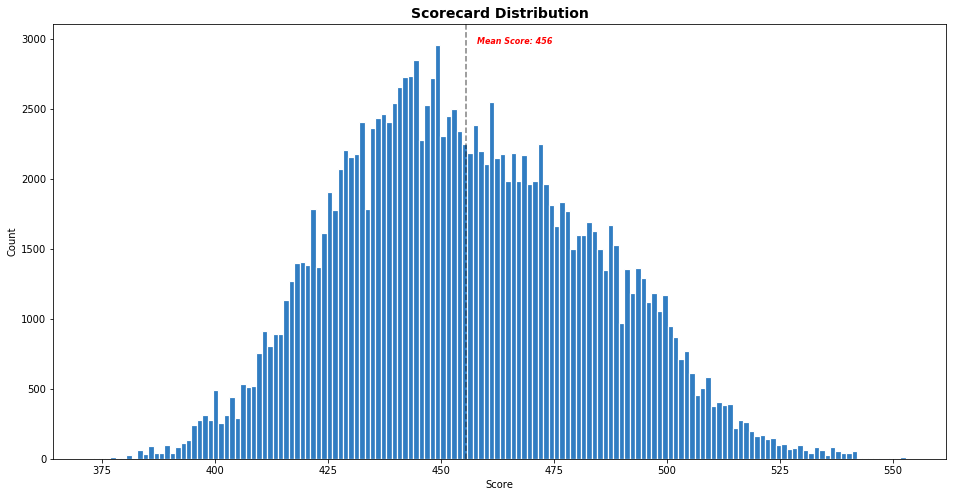

In [40]:
# Plot Distribution of Scores
plt.figure(figsize=(16,8))

plt.hist(scorecard['score'],
         bins=150,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

#plt.xlim(231,750)
plt.title('Scorecard Distribution', fontweight="bold", fontsize=14)
plt.axvline(scorecard['score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
plt.text(458, 2970, 'Mean Score: 456', color='red', fontweight='bold', style='italic', fontsize=8)
plt.xlabel('Score')
plt.ylabel('Count');

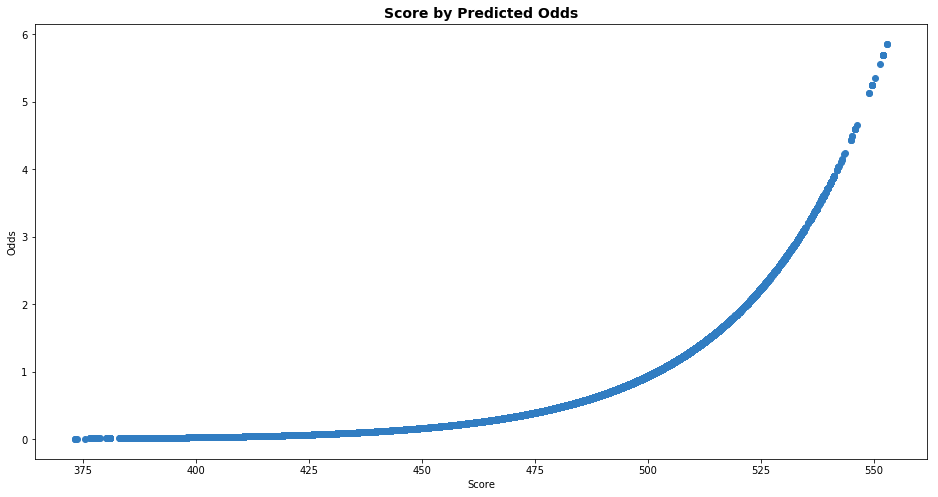

In [41]:
# Plot Scores Against Predicted Odds (Exponential Relationship)
plt.figure(figsize=(16,8))

plt.scatter(x='score',
            y='odds',
            data=scorecard,
            color='#317DC2')

plt.title('Score by Predicted Odds', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Odds');

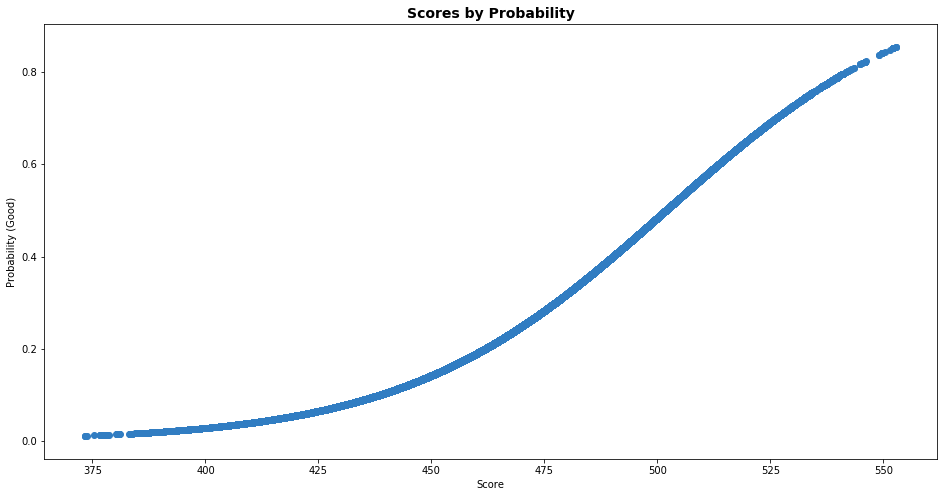

In [42]:
# Plot Scores Against Probabilities
plt.figure(figsize=(16,8))

plt.scatter(x='score',
            y='probs',
            data=scorecard,
            color='#317DC2')

plt.title('Scores by Probability', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Probability (Good)');

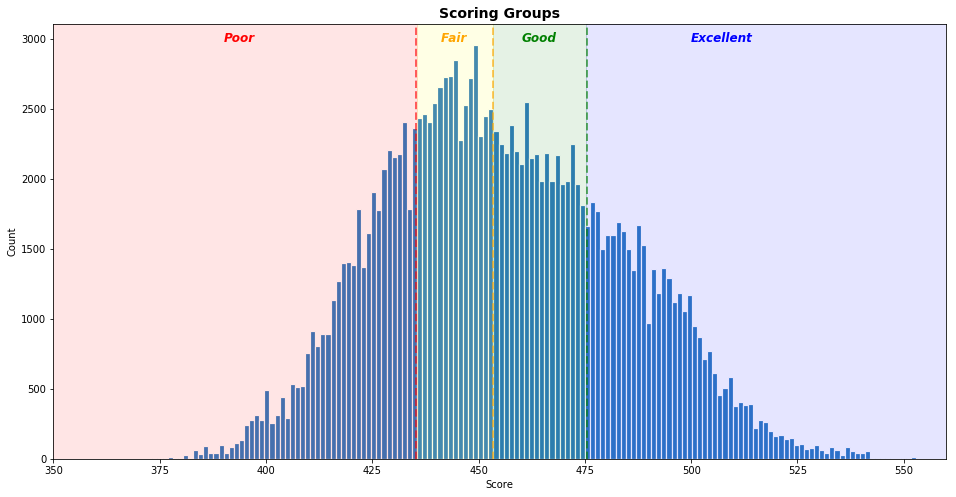

In [43]:
# Add Scoring Groups to Plot
plt.figure(figsize=(16,8))

plt.hist(scorecard['score'],
         bins=150,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

plt.xlim(350,560)
plt.title('Scoring Groups', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Count')

# Percentile Lines
plt.axvline(np.percentile(scorecard['score'],25), color='red', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(scorecard['score'],50), color='orange', linestyle='dashed', linewidth=2, alpha=0.6)
plt.axvline(np.percentile(scorecard['score'],75), color='green', linestyle='dashed', linewidth=2, alpha=0.6)

# Text
plt.text(390, 2980, 'Poor', color='red', fontweight='bold', style='italic', fontsize=12)
plt.text(441, 2980, 'Fair', color='orange', fontweight='bold', style='italic', fontsize=12)
plt.text(460, 2980, 'Good', color='green', fontweight='bold', style='italic', fontsize=12)
plt.text(500, 2980, 'Excellent', color='blue', fontweight='bold', style='italic', fontsize=12)

# Shading between Percentiles
plt.axvspan(350, 435.5, alpha=0.1, color='red')
plt.axvspan(435.5, 453.5, alpha=0.1, color='yellow')
plt.axvspan(453.5, 475.38, alpha=0.1, color='green')
plt.axvspan(475.38, 560, alpha=0.1, color='blue');

<a name="score"></a>

<div class="alert alert-info">
<b>Scoring New Data</b>
</div>

In [46]:
# Just take 5 Samples for Fake Test Set to Show Scoring
test_data = pd.DataFrame(conn.CASTable('credit_data').head())

In [47]:
# Load to CAS
test_data = conn.upload_frame(test_data, casout=dict(name='test_data', replace=True))

NOTE: Cloud Analytic Services made the uploaded file available as table TEST_DATA in caslib credit.
NOTE: The table TEST_DATA has been created in caslib credit from binary data uploaded to Cloud Analytic Services.


In [48]:
# Create Function from SAS Actions to Score From Data to WOE to Imputation to Logistic
def model_scoring(conn, woe_code_tbl, lr_code_tbl, test_tbl, scored_tbl_name):
    
    conn.datastep.runcodetable(codetable = woe_code_tbl,
                               table = test_tbl,
                               casOut = dict(name='woe_out_tbl_1'))
    
    conn.impute(table=dict(name = 'woe_out_tbl_1'),
                           methodInterval = 'VALUE',
                           valuesInterval = [0],
                           casout = dict(name='imp_out_tbl_2', replace=True),
                           outVarsNamePrefix = '')
    
    conn.datastep.runcodetable(codetable = lr_code_tbl,
                               table = 'imp_out_tbl_2',
                               casOut = dict(name=scored_tbl_name))

In [49]:
# Score Data
model_scoring(conn, 'woe_code', 'lr_code', test_data, 'scored_data')